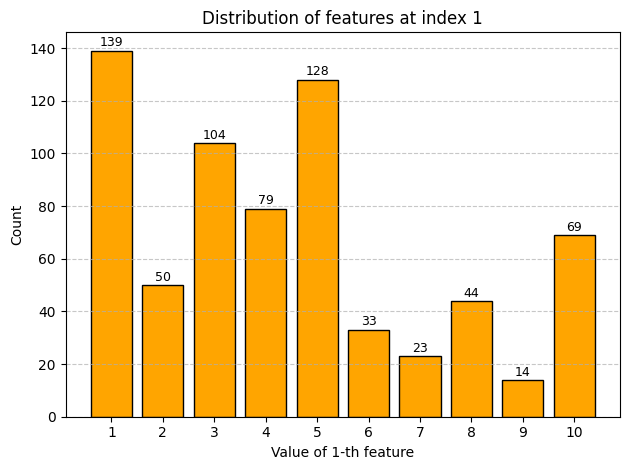

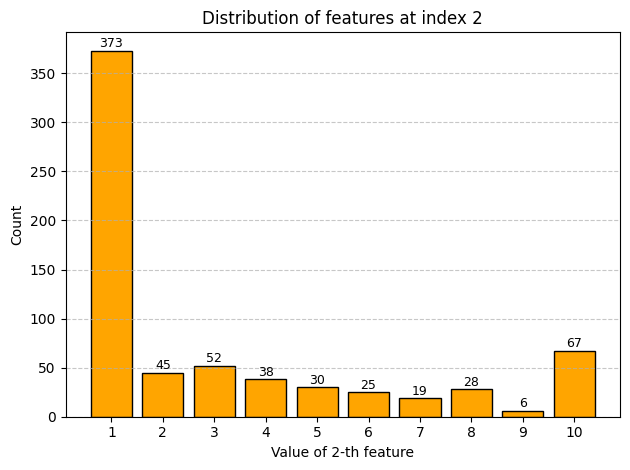

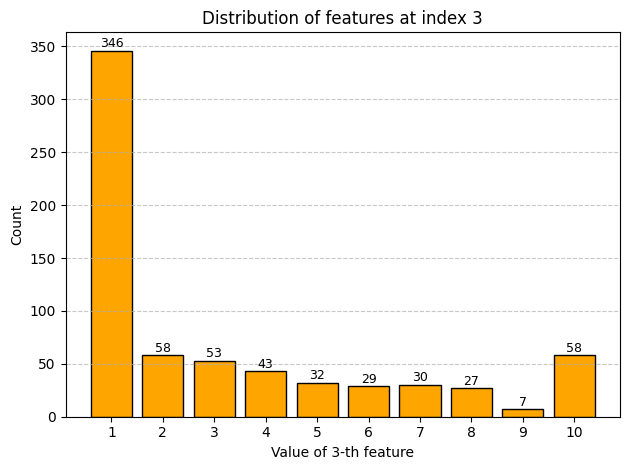

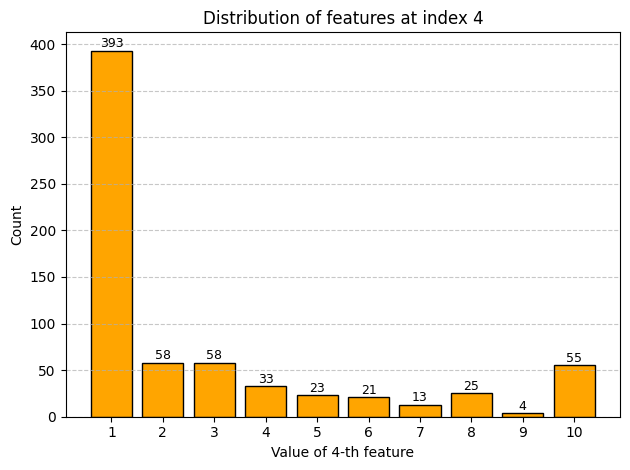

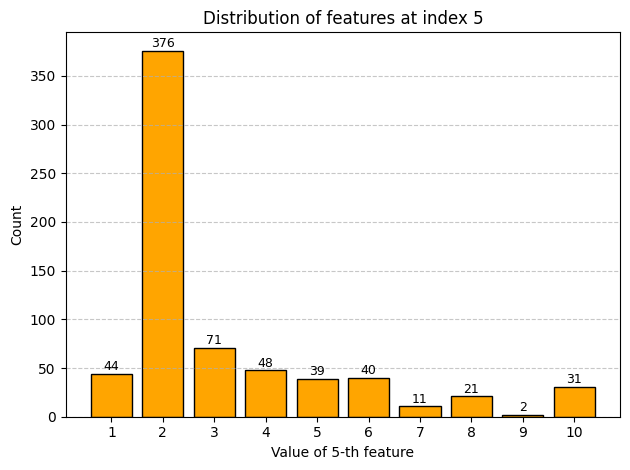

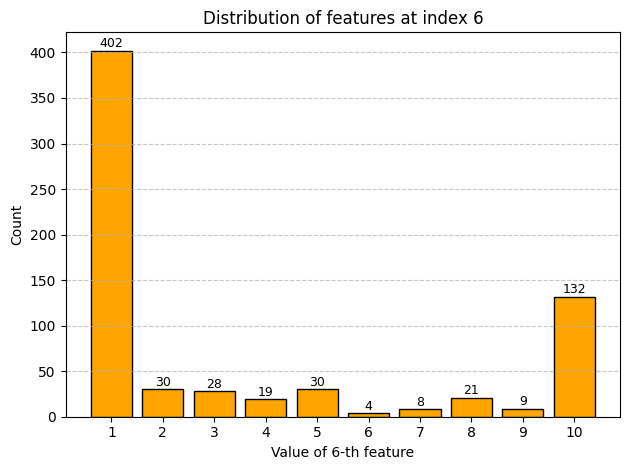

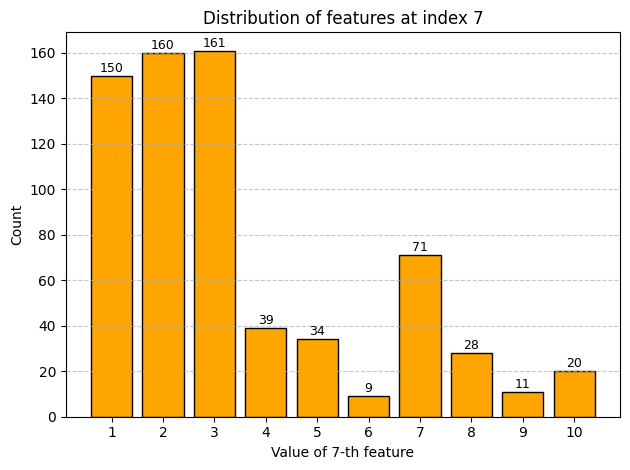

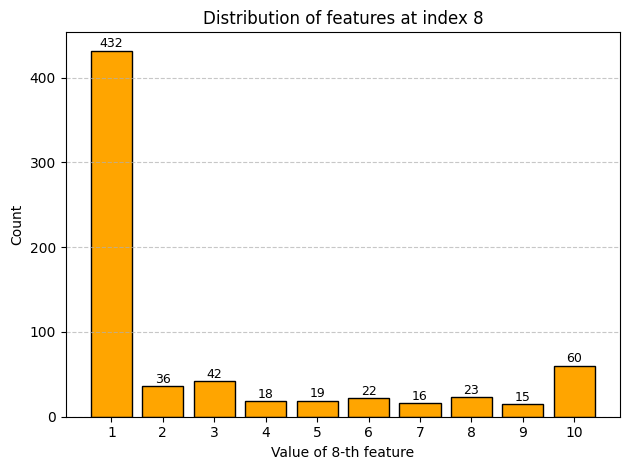

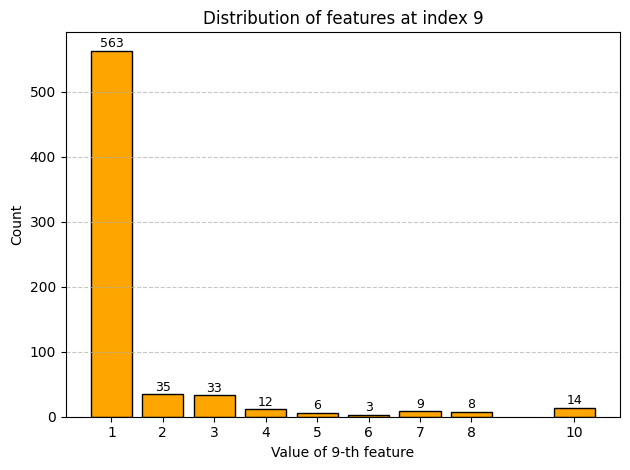

In [1]:
from utility import prepare_data
from utility import plot_count

train, test = prepare_data("../rp.data", 1)
for i in range(9):
    plot_count(train, i)
    

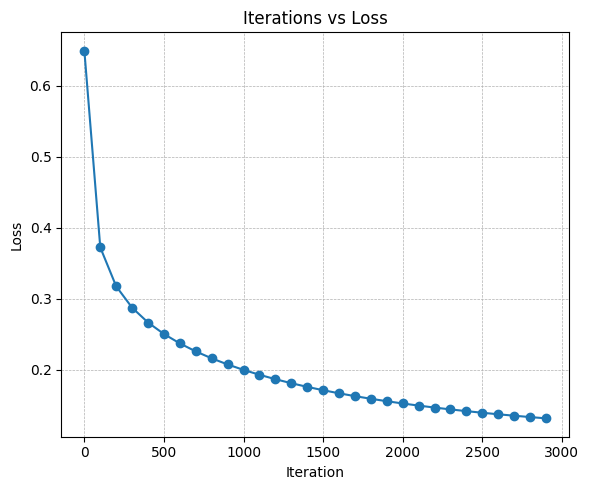

In [2]:
from logistic_regression import LogisticRegression
from utility import parse_data, how_good, plot_data


model = LogisticRegression("../rp.data", n = 3000, lr = 0.025)
model.select_fraction(1)
model.fit(0.00001)

X = [x[0] for x in  model.learning_curve]
Y = [x[1] for x in  model.learning_curve]
plot_data(X, Y, "Iterations vs Loss", "Iteration", "Loss")


In [5]:
import numpy as np
from naive_classificator import NaiveClassificator
model = NaiveClassificator("../rp.data")
model.estimate()
array = model.compare()
print(model.check_accuracy())


(0.9778761061946902, 0.9625, 0.9746835443037974, 0.9795918367346939)


In [4]:
import numpy as np
from naive_classificator import NaiveClassificator
from utility import how_good, plot_data
F = [0.01, 0.02, 0.03, 0.125, 0.625, 1]
res = []
for frac in F:
    results = []
    for i in range(20):
        model = NaiveClassificator("../rp.data")
        model.select_fraction(frac)
        model.estimate()
        a, p, s, ss = model.check_accuracy()
        results.append(how_good(p, s))
    result = np.mean(results)
    res.append(result)

In [6]:
import numpy as np
from logistic_regression import LogisticRegression
from utility import how_good, plot_data
F = [0.01, 0.02, 0.03, 0.125, 0.625, 1]
res = []
for frac in F:
    results = []
    for i in range(5):
        model = LogisticRegression("../rp.data", n = 15000, lr = 0.025)
        model.select_fraction(frac)
        model.fit()
        a, p, s, ss = model.check_accuracy()
        results.append(how_good(p, s))
    result = np.mean(results)
    res.append(result) 

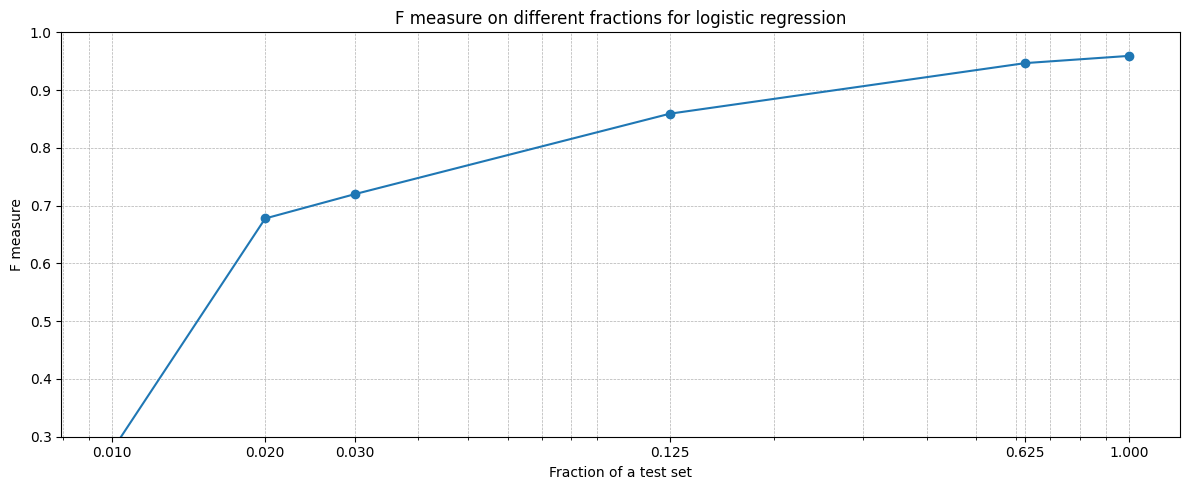

In [7]:
plot_data(F, res, "F measure on different fractions for logistic regression", "Fraction of a test set", "F measure")

In [21]:
import numpy as np
from logistic_regression import LogisticRegression
from utility import how_good, plot_data
F = [0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.125, 0.625, 1]
res = []
cost = []
for reg in F:
    results = []
    costs = []
    for i in range(3):
        model = LogisticRegression("../rp.data",  n = 5000, lr = 0.025)
        model.fit(reg)
        a, p, s, ss = model.check_accuracy()
        results.append(how_good(p, s))
        features = np.array([x[0] for x in model.test])
        planning_matrix = np.hstack((np.ones((features.shape[0], 1)), features))
        targets = np.array([x[1] for x in model.test])
        costs.append(model.cost(planning_matrix, targets, reg))
    result = np.mean(results)
    costs=np.mean(costs)
    cost.append(costs)
    res.append(result)

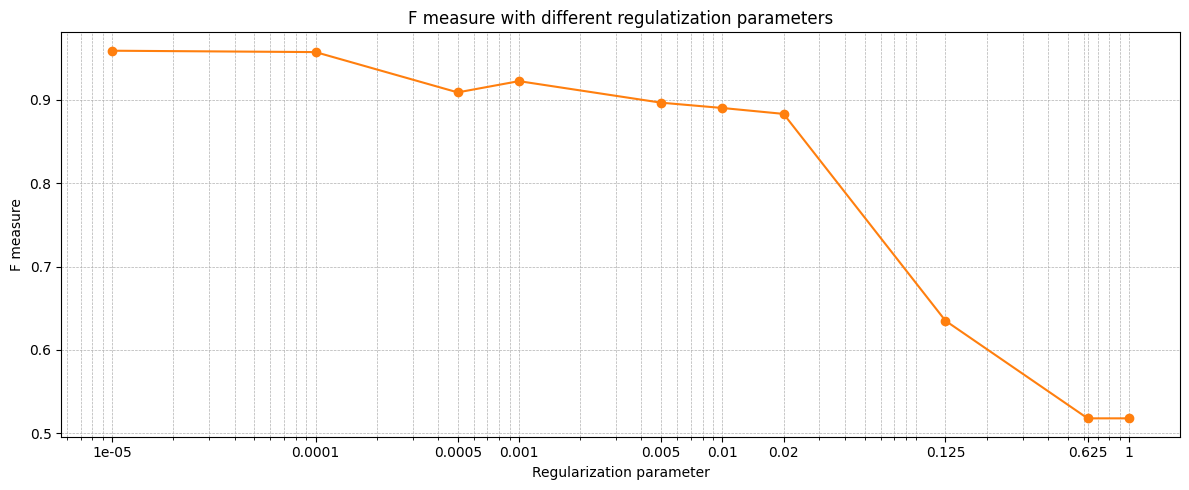

In [29]:
plot_data(F, res, "F measure with different regulatization parameters", "Regularization parameter", "F measure")

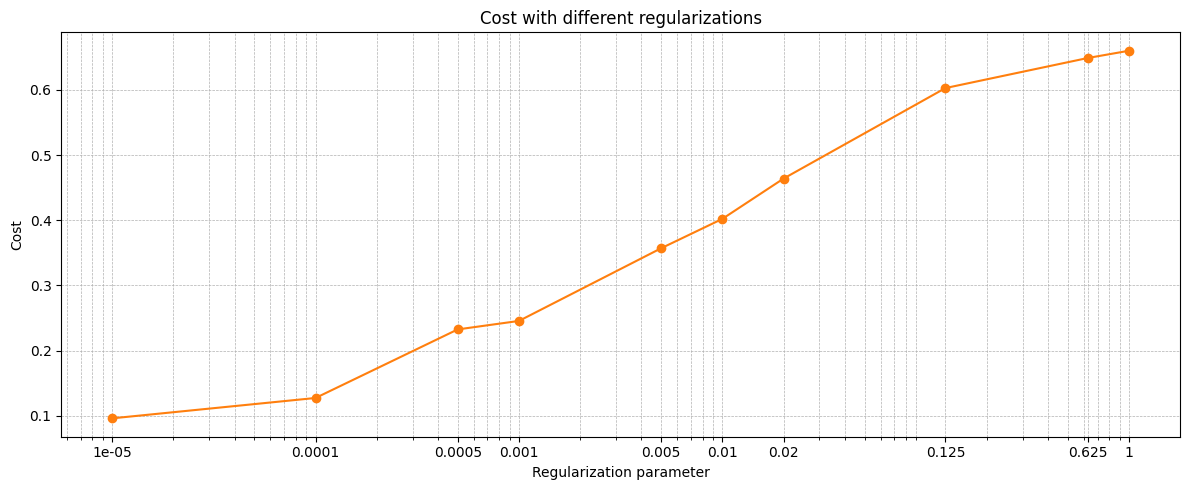

In [28]:
plot_data(F, cost, "Cost with different regularizations", "Regularization parameter", "Cost")

In [9]:
from naive_classificator import NaiveClassificator
from utility import parse_data, how_good, plot_data


model = NaiveClassificator("../rp.data")
model.estimate()
a, p, s, ss = model.check_accuracy()
f1 = how_good(p, s)
labels = ["Accuracy", "Precision", "Sensitivity", "Specificity", "F measure"]
values = [f"{x:.3f}" for x in [a, p, s, ss, f1]]
print(labels, values)

['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F measure'] ['0.978', '0.963', '0.975', '0.980', '0.969']
